In [1]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, sys
current_dir = os.getcwd()
while os.path.basename(current_dir) != 'nets2':
    current_dir = os.path.dirname(current_dir)
    if current_dir == os.path.dirname(current_dir): 
        raise Exception("'nets2' directory not found in parent directories")
    
sys.path.insert(1, os.path.join(current_dir, 'scripts'))
sys.path.insert(1, os.path.join(current_dir, 'stella'))
from utils import *
import pickle
from scipy import stats

/home/astro/phrdhx/micromamba/envs/nets2/lib/python3.8/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/astro/phrdhx/.lightkurve/cache. Please move all the files in the legacy directory /home/astro/phrdhx/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
def load_predictions(file_path):
    """Load the pickle file"""
    data = []
    with open(file_path, 'rb') as f:
        while True:
            try:
                data.append(pickle.load(f))
            except EOFError:
                break
    return data

def read(path):
    return pd.DataFrame(load_predictions(path))

In [24]:
data = pd.DataFrame(load_predictions('../s6.pkl'))

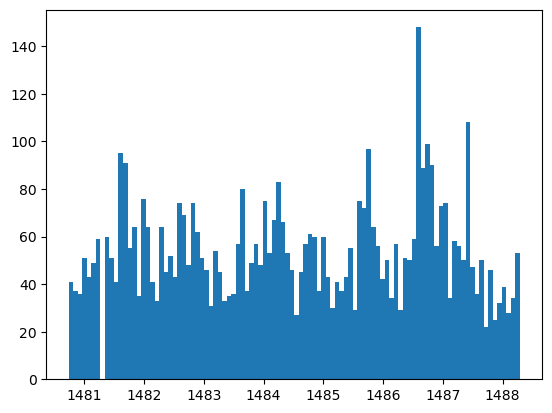

In [25]:
plt.hist(data[data.pred > 0.9].t_pred,bins=100)
plt.show()

In [26]:
df = data[data.pred > 0.9].sample(100).reset_index()

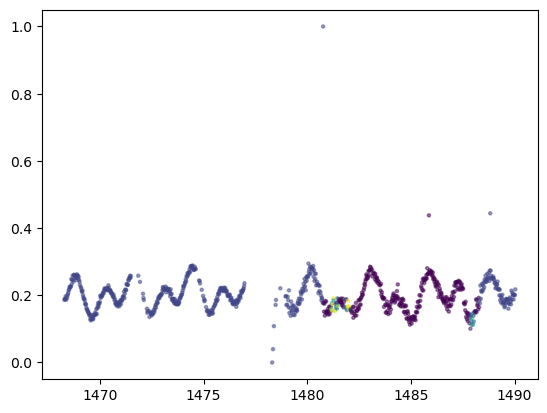

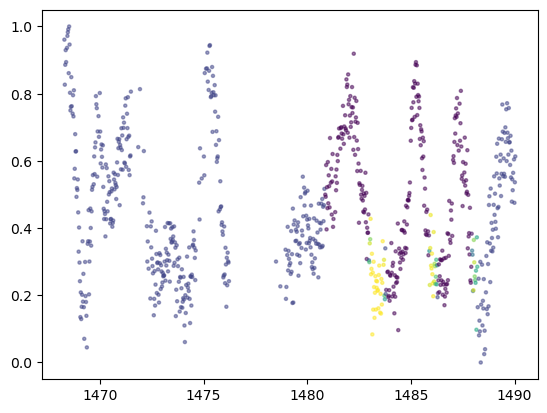

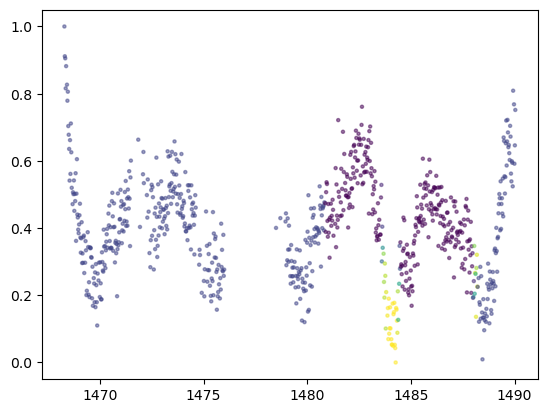

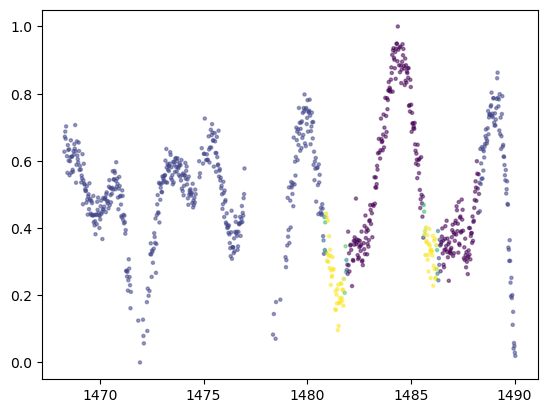

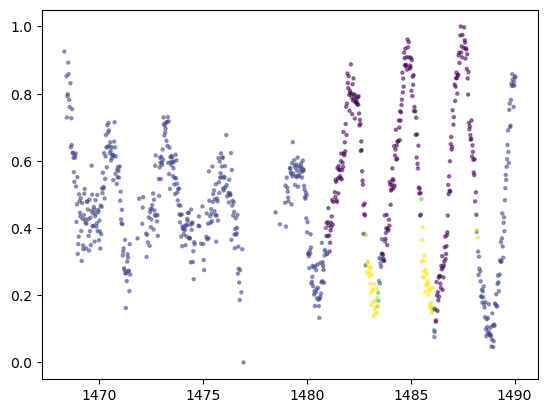

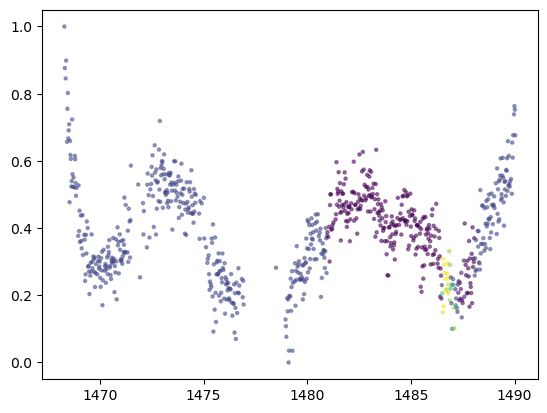

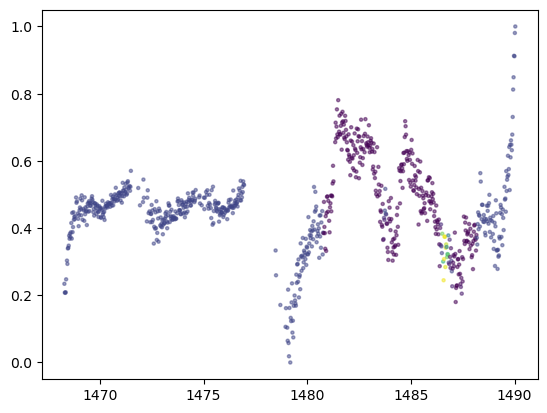

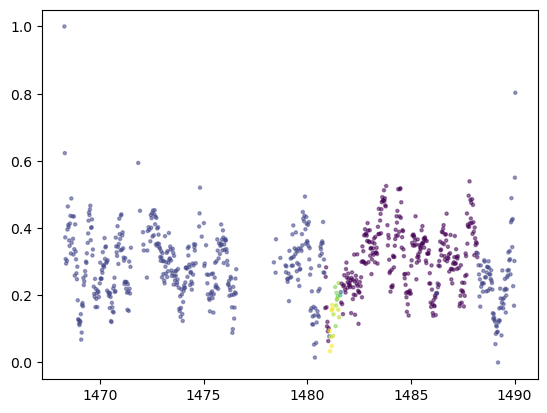

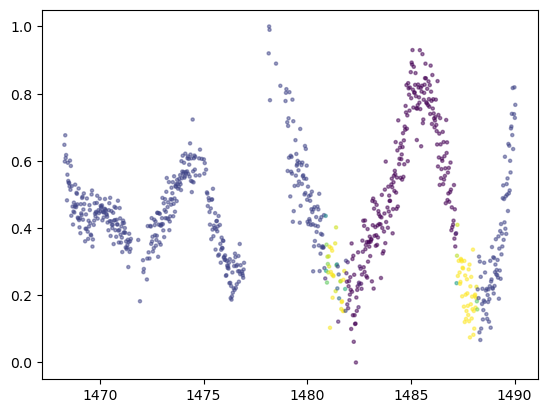

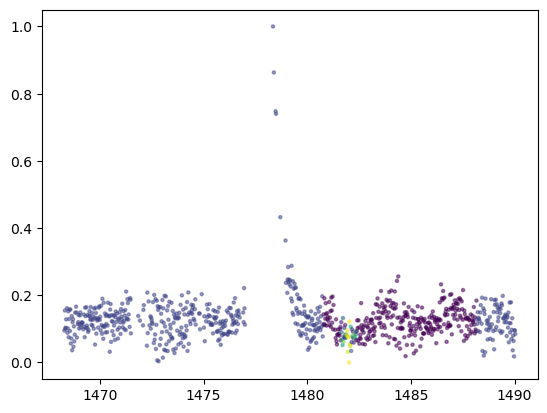

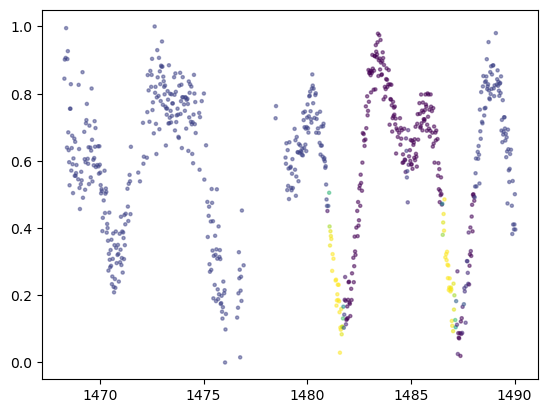

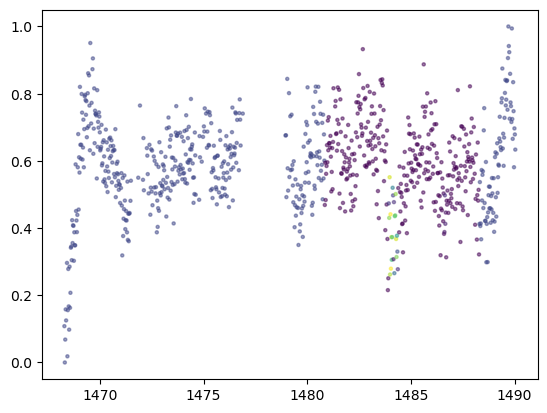

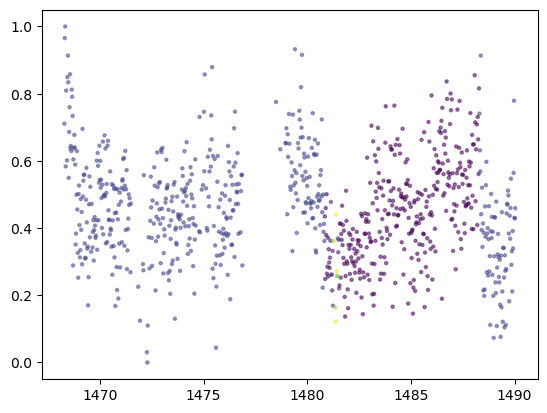

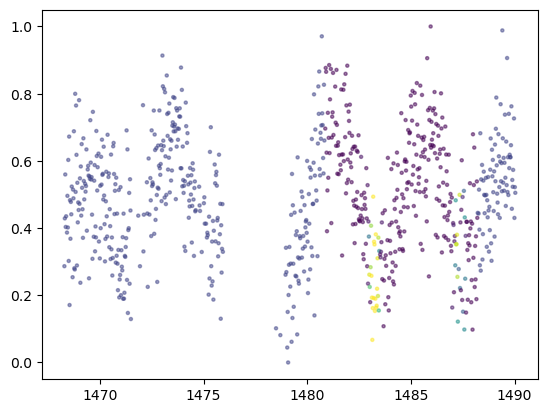

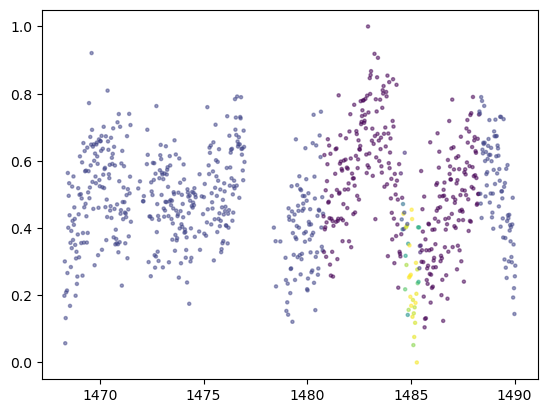

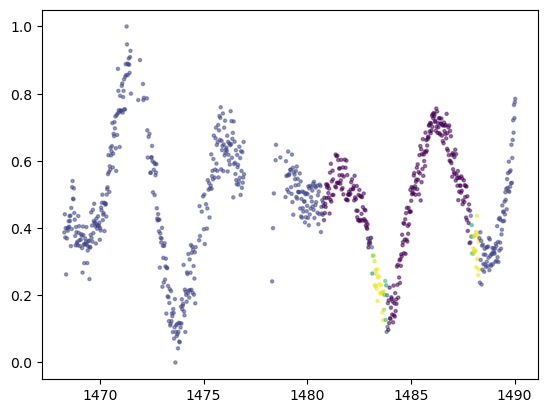

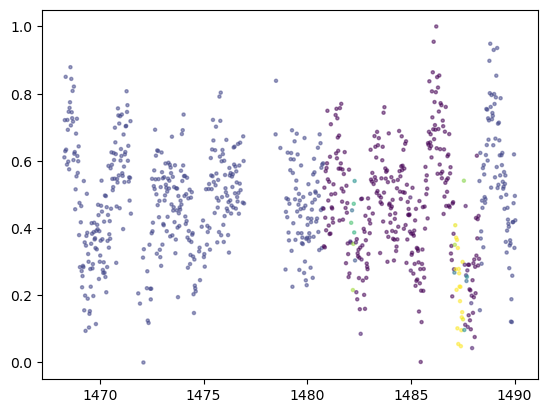

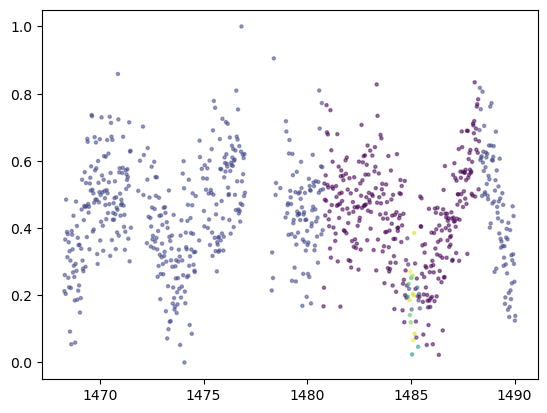

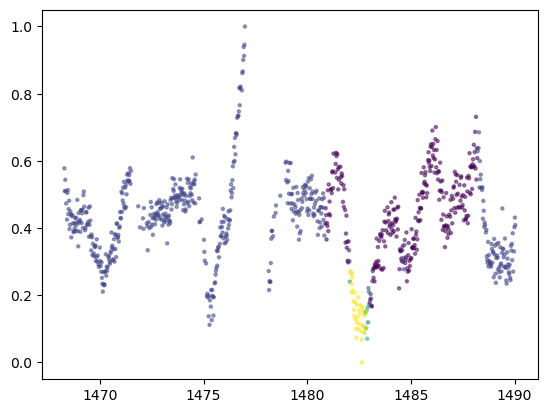

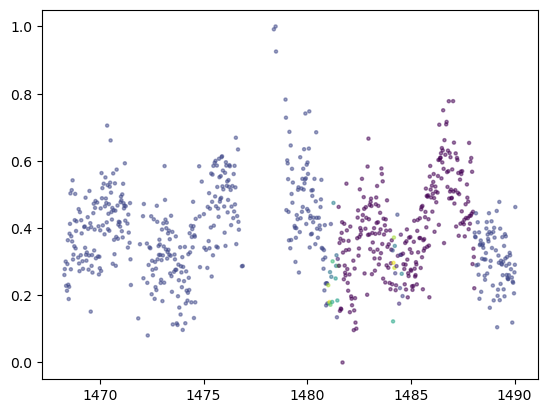

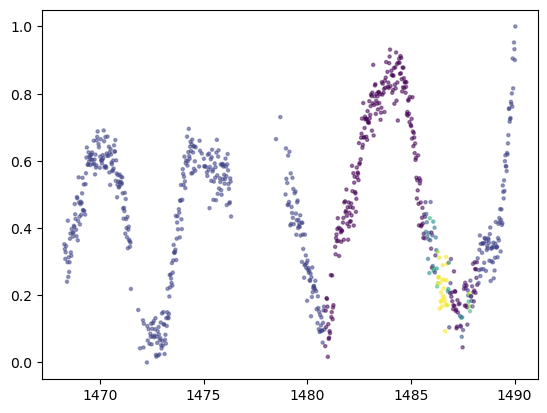

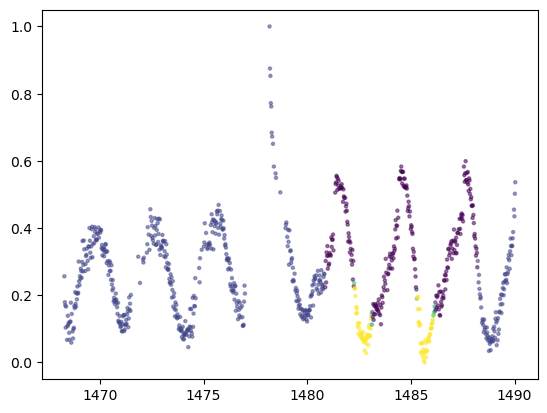

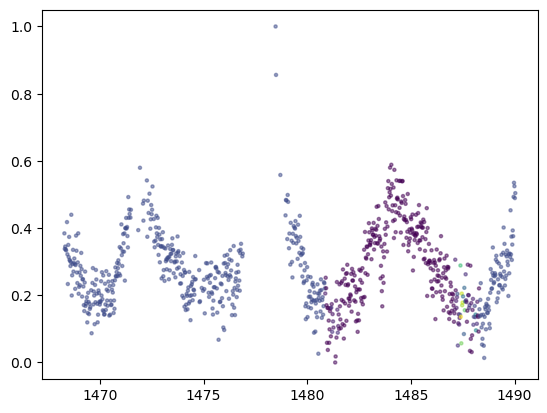

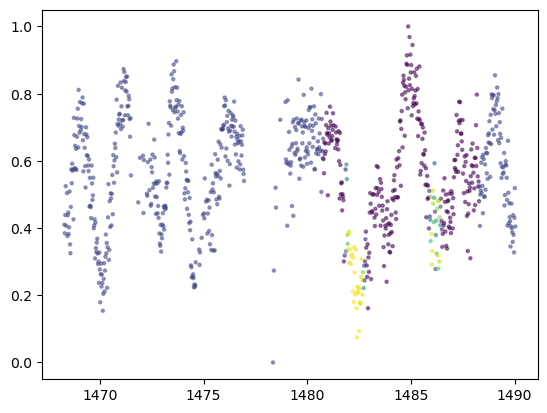

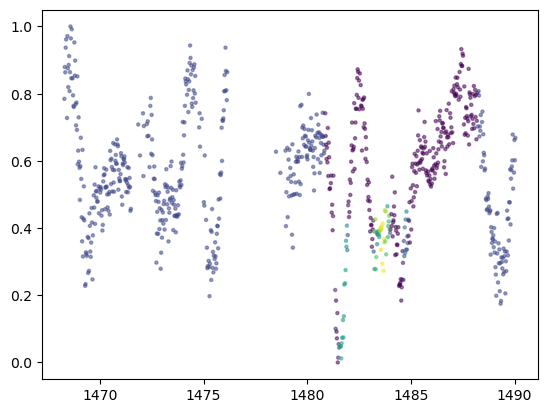

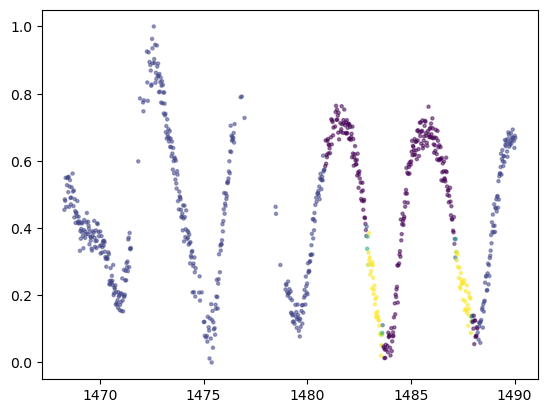

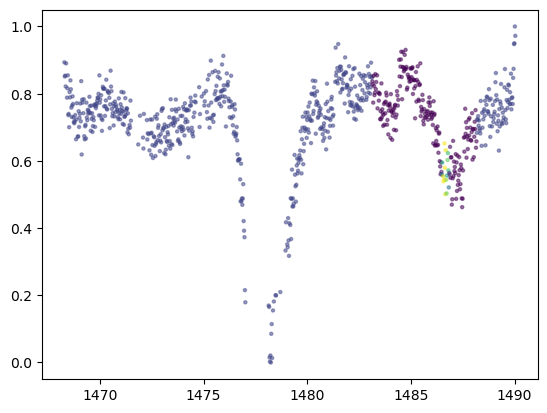

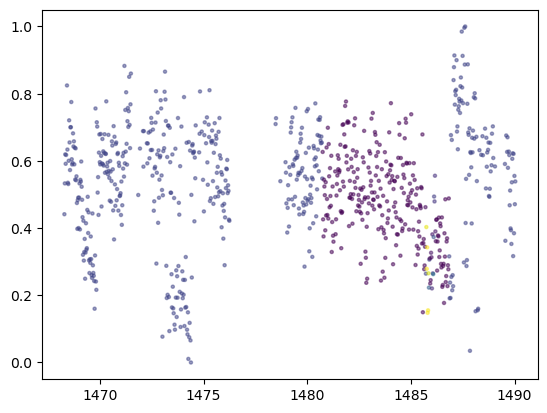

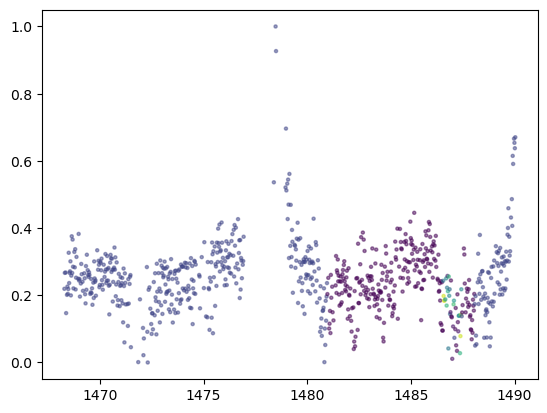

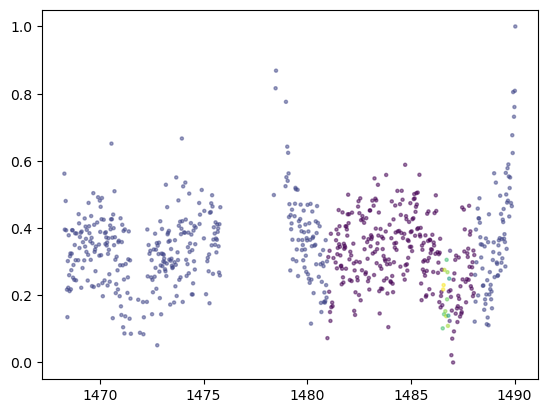

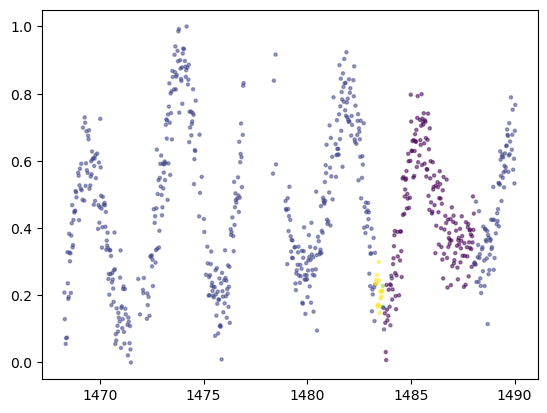

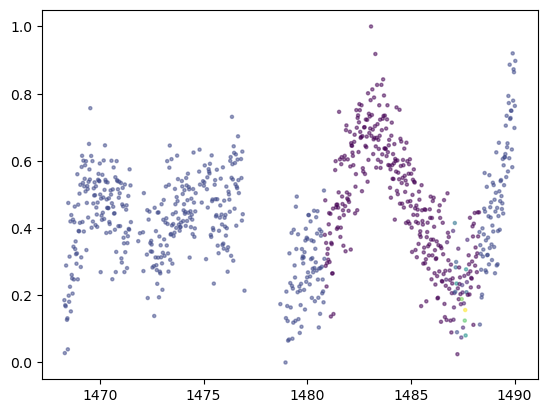

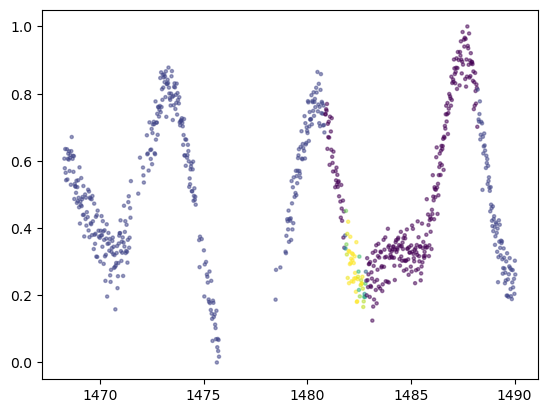

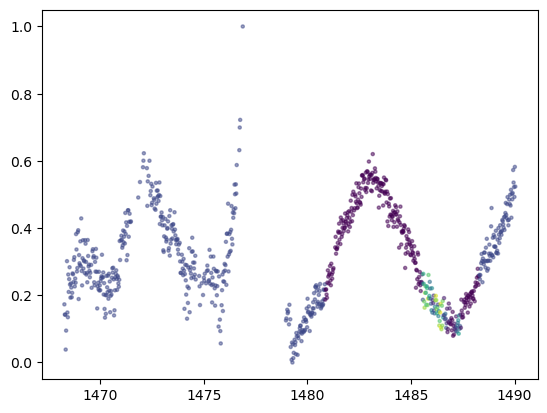

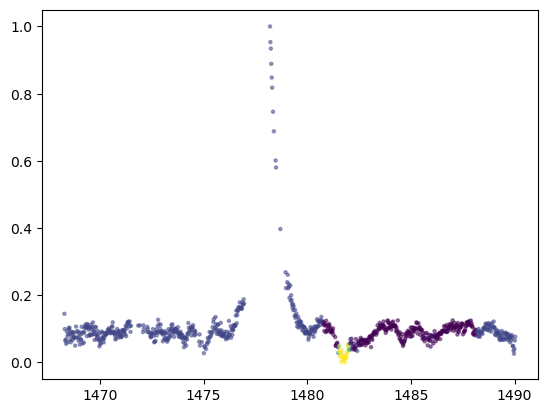

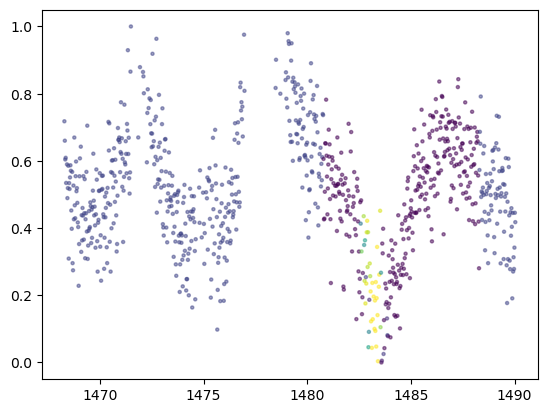

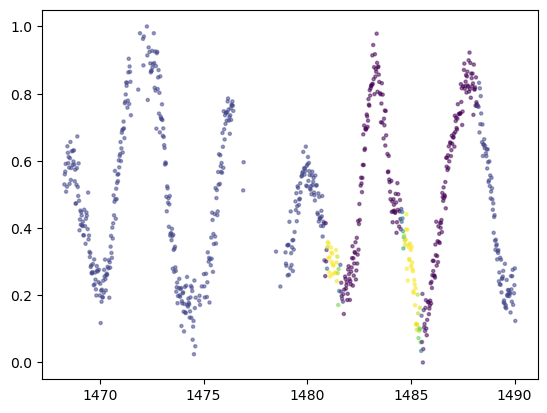

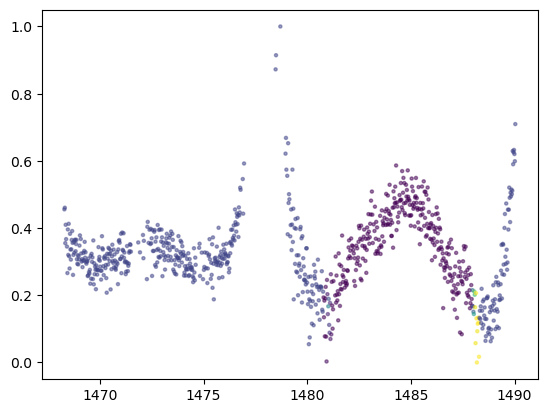

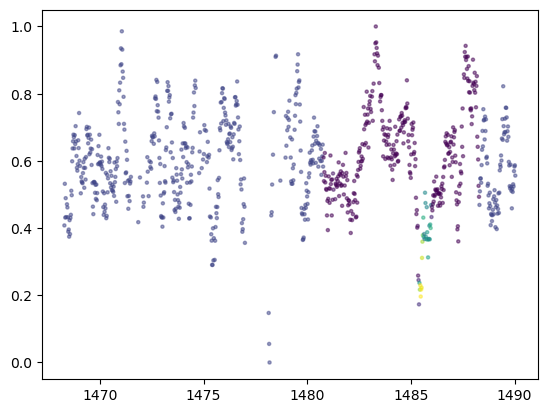

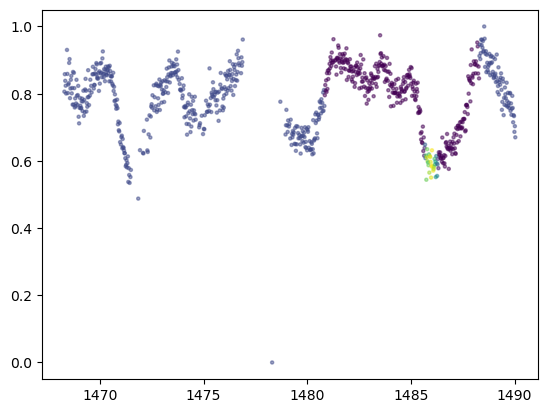

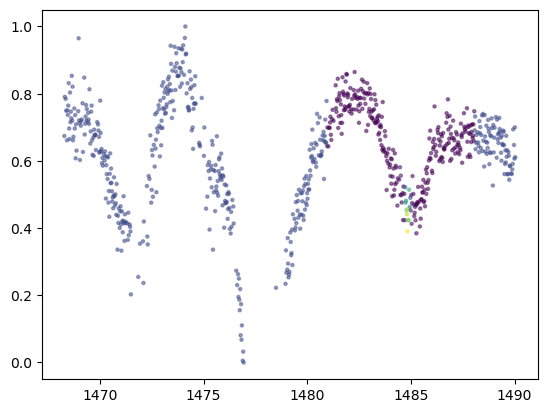

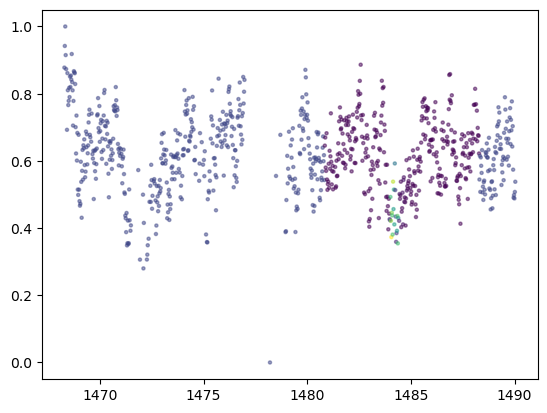

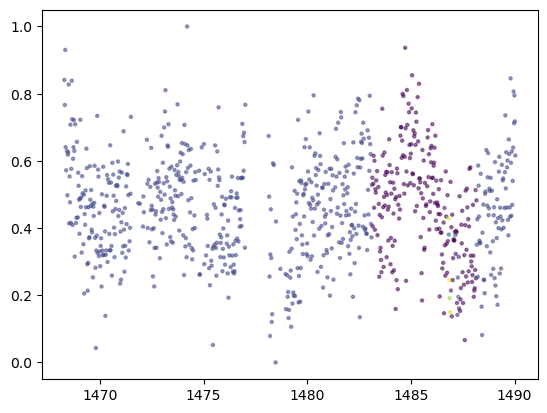

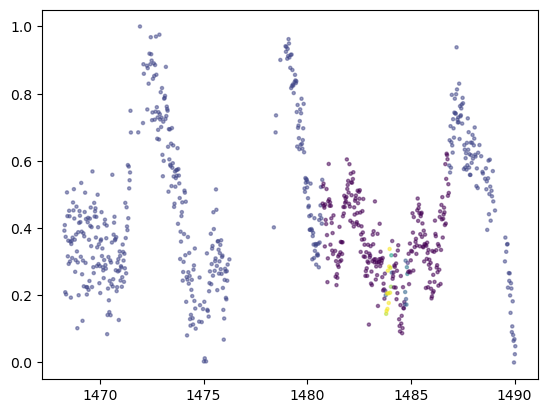

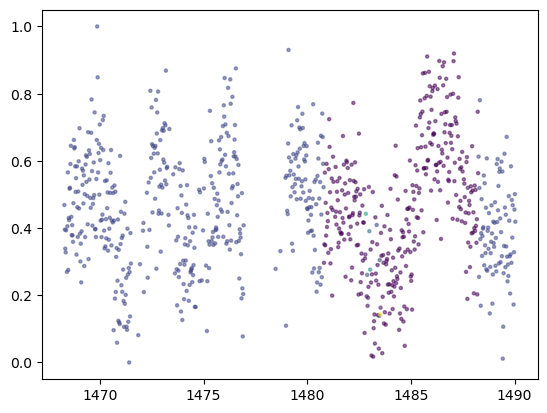

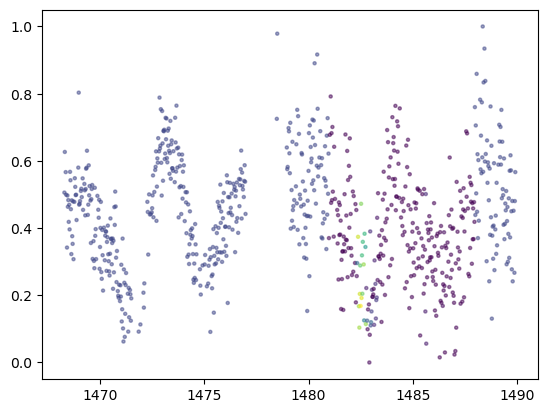

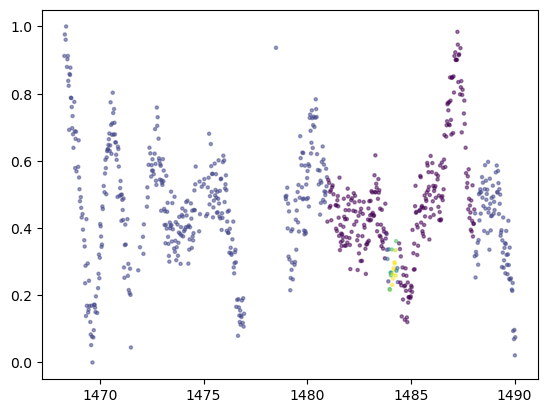

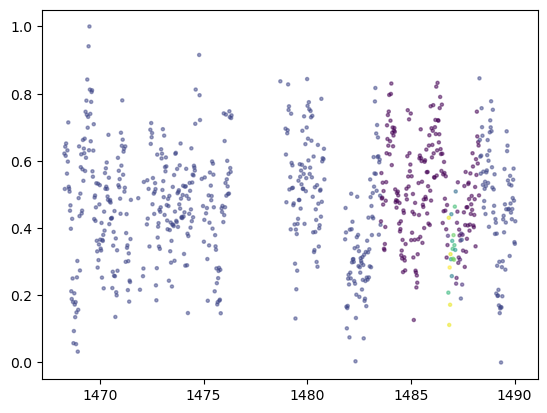

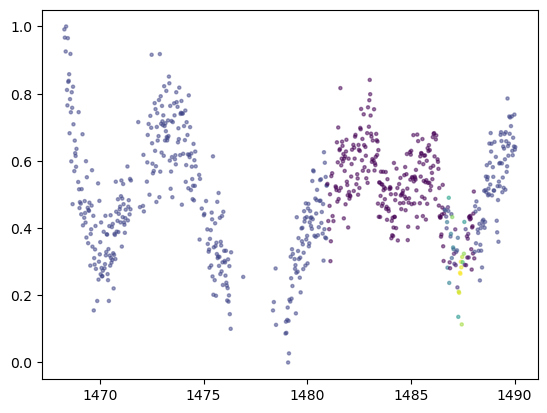

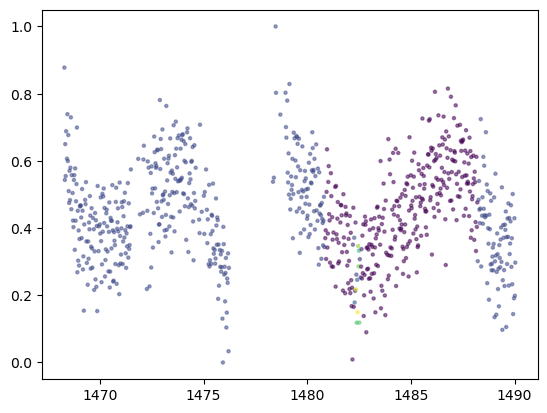

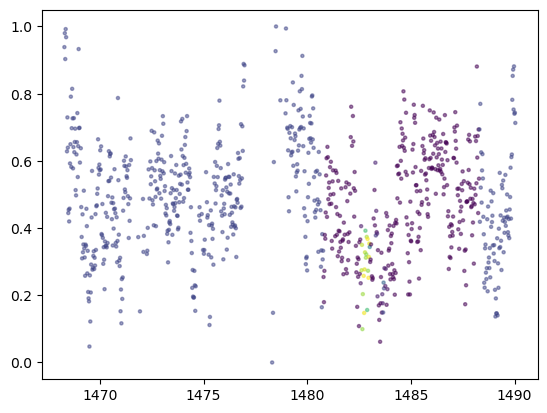

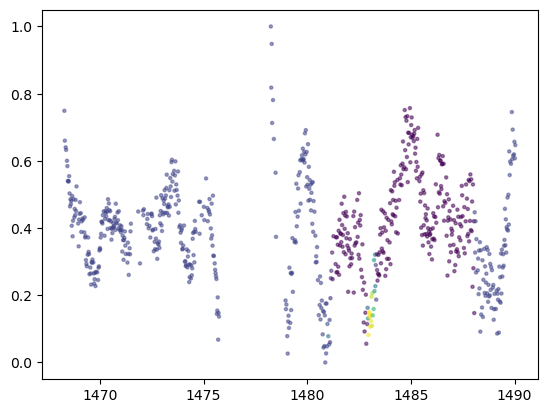

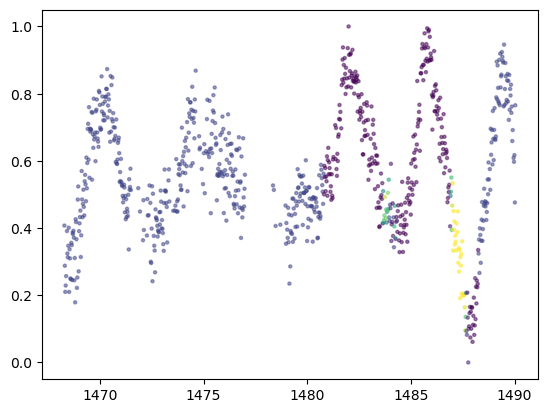

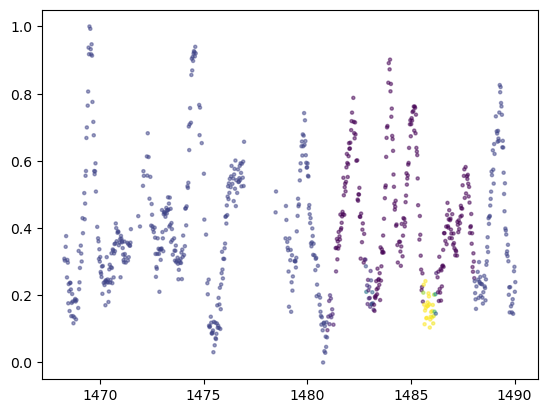

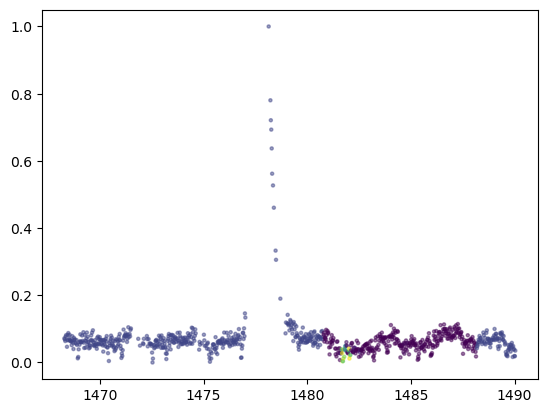

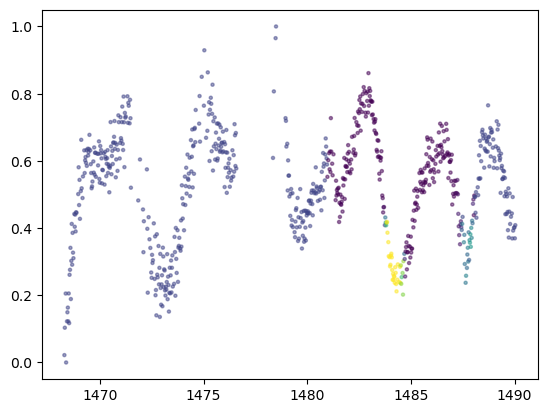

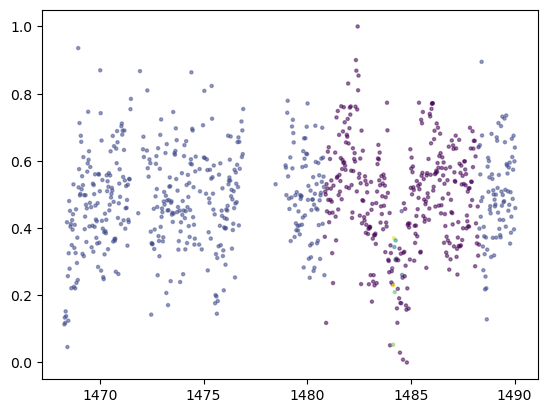

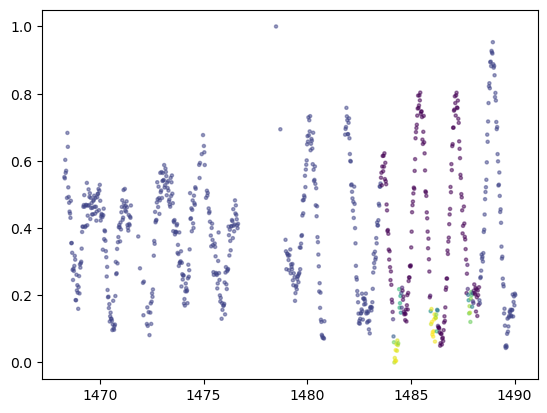

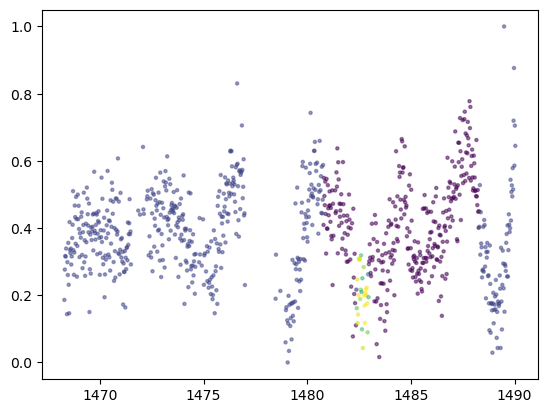

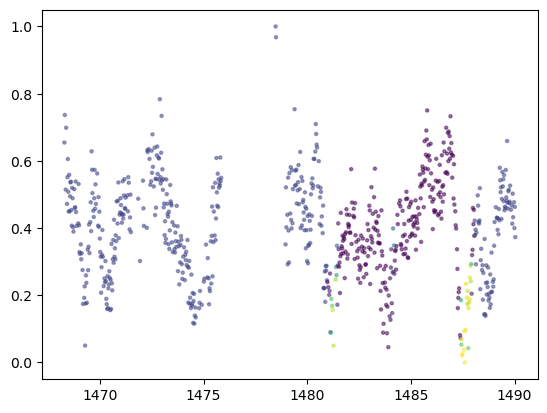

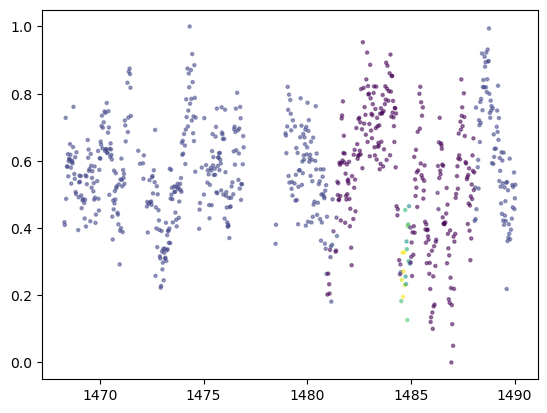

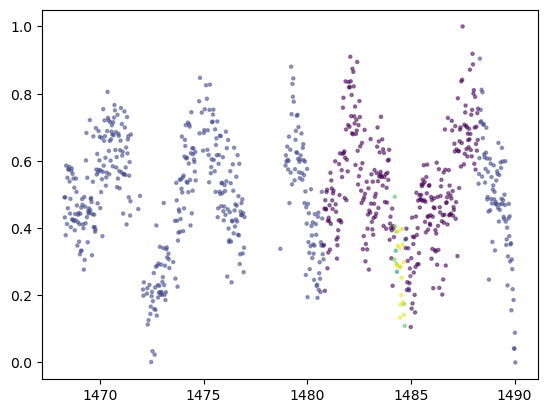

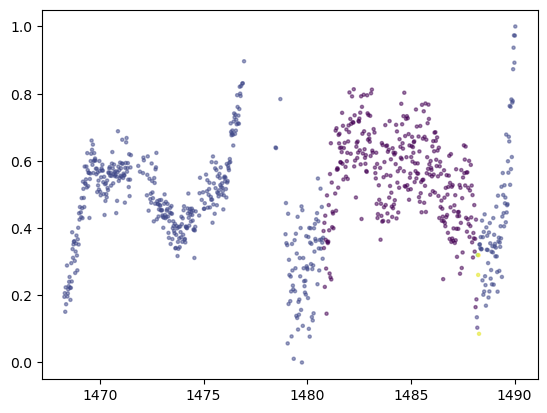

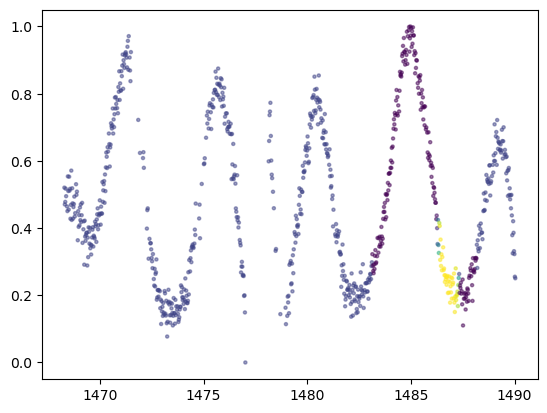

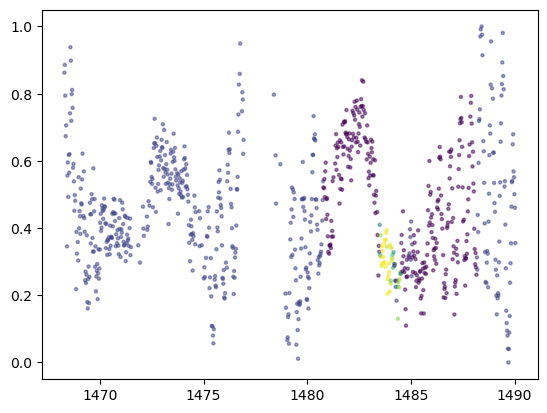

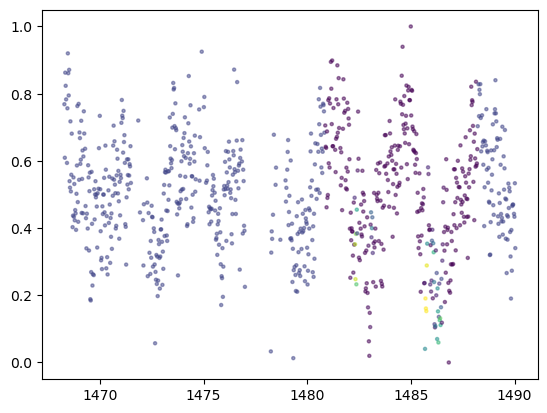

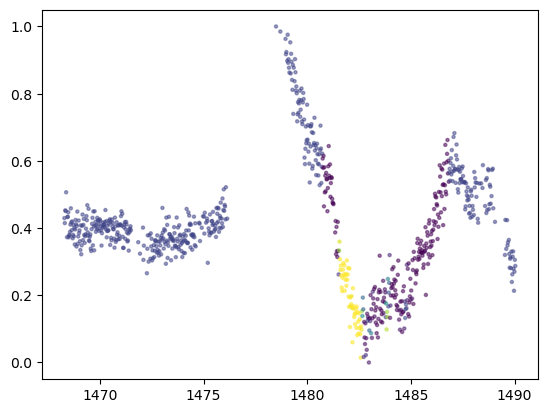

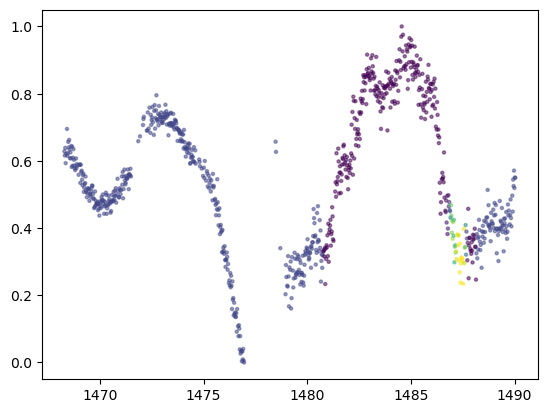

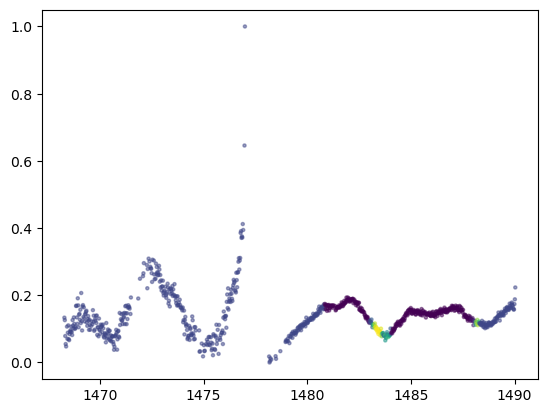

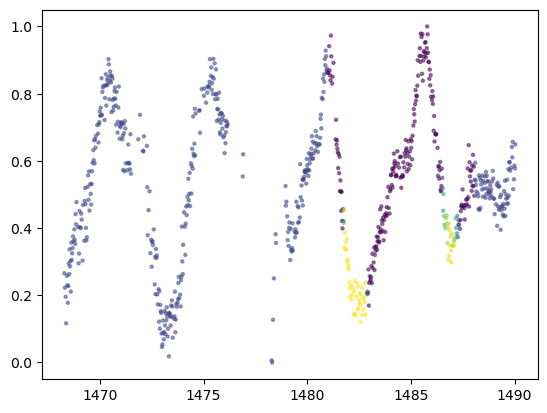

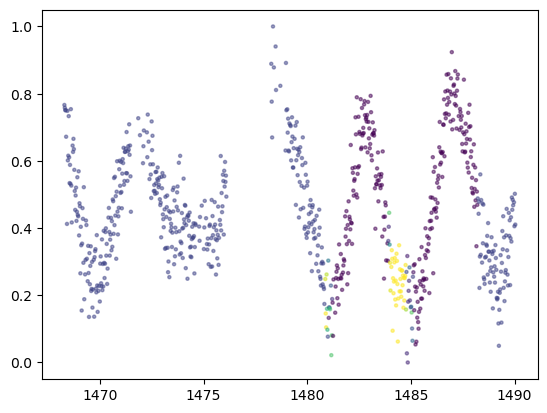

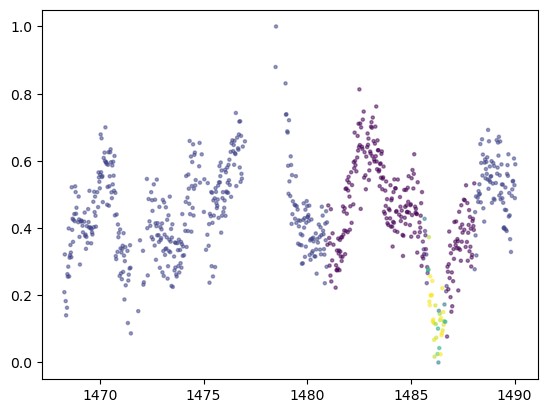

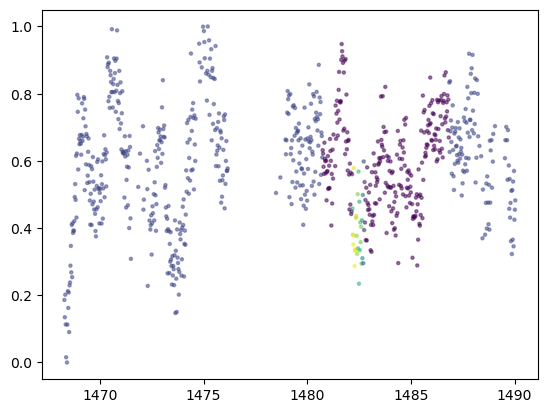

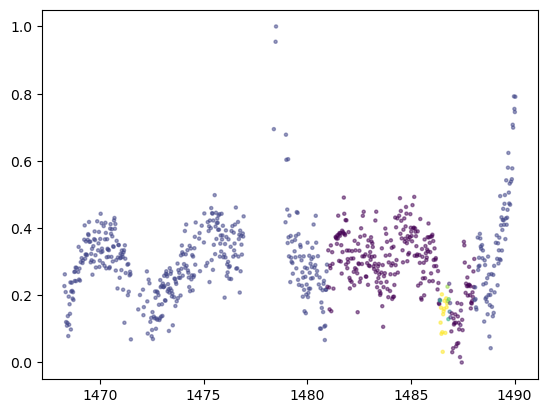

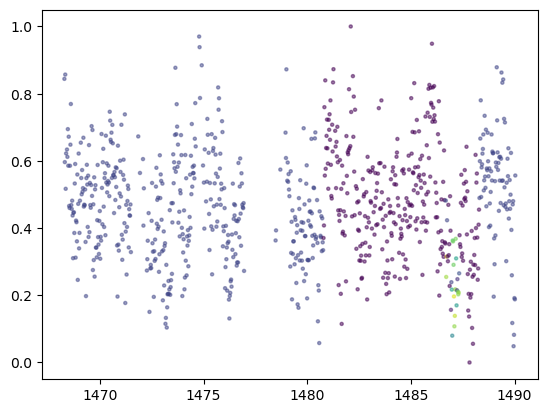

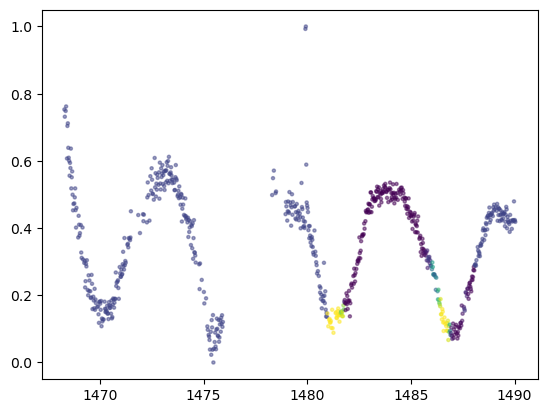

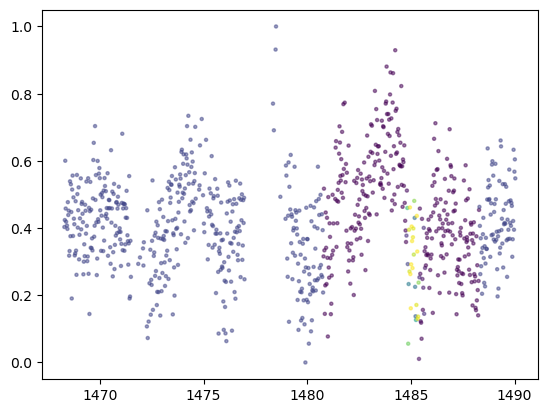

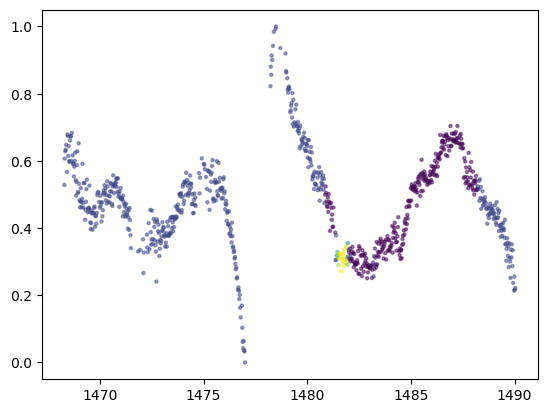

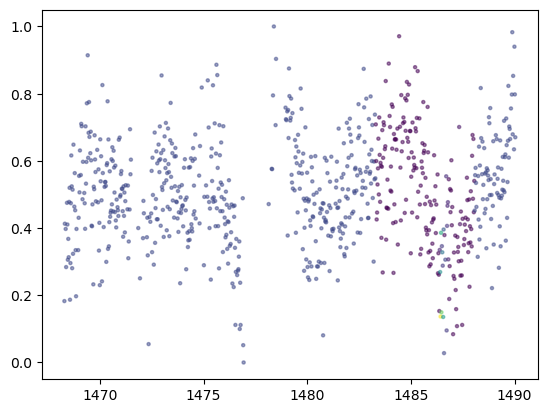

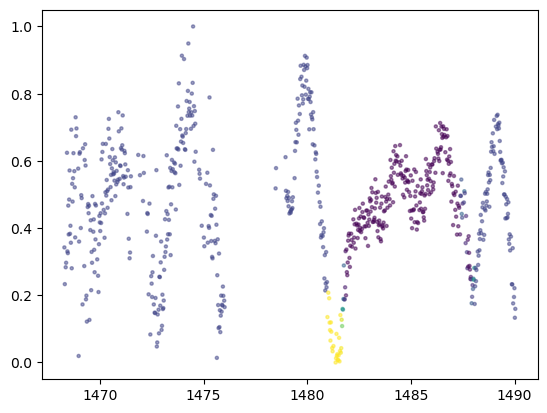

In [27]:
for i in df.index[20:]:
    time = df.loc[i].time
    flux = df.loc[i].flux
    preds = df.loc[i].predictions
    plt.scatter(time,flux,c=preds,s=5,alpha=0.5)
    plt.show()